In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
viz = pd.read_csv('twitter_archive_master.csv')

#### 1.评分

In [6]:
#新建一列标准评分
viz['std_rating'] = viz['rating_numerator']*10/viz['rating_denominator']

In [10]:
viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1577 non-null float64
rating_denominator    1577 non-null float64
name                  1356 non-null object
stage                 297 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
std_rating            1577 non-null flo

In [9]:
viz.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count,std_rating
count,1.994000e+03,1577.000000,1577.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000,1994.000000,1577.000000
mean,7.358508e+17,11.213557,10.583386,1.203109,0.593941,1.344195e-01,6.024848e-02,8923.133400,2770.021063,10.681050
std,6.747816e+16,8.027832,7.912244,0.560777,0.271954,1.006807e-01,5.089067e-02,12400.238808,4715.961325,2.443188
min,6.660209e+17,1.000000,10.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,81.000000,15.000000,0.235294
25%,6.758475e+17,9.000000,10.000000,1.000000,0.362857,5.393988e-02,1.619283e-02,1972.250000,622.250000,9.000000
50%,7.084748e+17,11.000000,10.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,4117.000000,1348.500000,11.000000
75%,7.877873e+17,12.000000,10.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,11275.500000,3202.750000,12.000000
max,8.924206e+17,165.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,132318.000000,79116.000000,14.000000


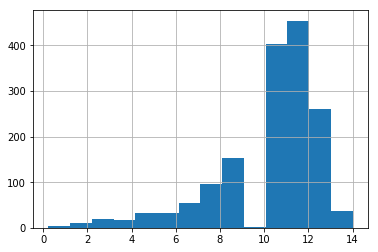

In [15]:
#标准评分直方图
viz.std_rating.hist(bins=14)

1577个有效评分的均值为10.68，大部分评分都在满分10分以上，最多次数的评分为12分，其次为11分。

#### 2.喜爱数和转发数

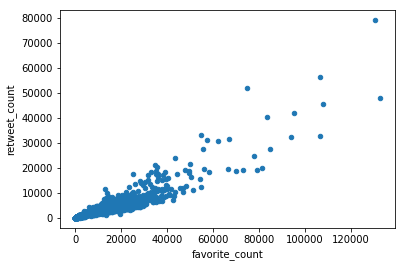

In [16]:
#喜爱数和转发数的关系图
viz.plot(x='favorite_count', y='retweet_count', kind='scatter');

In [31]:
viz[['favorite_count', 'retweet_count']].corr()

,favorite_count,retweet_count
favorite_count,1.000000,0.915022
retweet_count,0.915022,1.000000


平均喜爱数为8923，平均转发数为2770，两者呈线性相关。

#### 3.狗狗地位对喜爱数和转发数的影响

In [39]:
viz.groupby('stage')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
doggo,63.0,19284.174603,22125.538490,2581.0,8240.00,12323.0,20444.0,130533.0
floofer,8.0,13652.250000,10480.557016,2255.0,5529.25,11830.5,18573.0,33209.0
pupper,203.0,7176.157635,10687.768107,687.0,2413.00,3217.0,7641.0,106481.0
puppo,23.0,22643.652174,27831.569684,3265.0,7040.50,15329.0,21898.0,132318.0


In [40]:
viz.groupby('stage')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
doggo,63.0,7088.396825,12806.187498,718.0,2015.5,3300.0,5388.5,79116.0
floofer,8.0,4745.500000,5682.301797,494.0,2156.0,3334.5,4107.5,18343.0
pupper,203.0,2352.285714,3558.409135,102.0,686.0,1189.0,2447.0,32705.0
puppo,23.0,6986.260870,10345.255558,707.0,1714.0,3202.0,7487.5,47958.0


puppo平均收到22644次喜爱，是平均收到最多次喜爱的狗狗地位。  
dogggo平均被7088次转发，是平均被转发次数最多的狗狗地位，puppo平均被转发次数紧随其后，为6986次。

In [44]:
viz.groupby('p1_dog').p1_conf.mean()

p1_dog
False    0.535596
True     0.614364
Name: p1_conf, dtype: float64

只分析神经网络对狗狗种类预测可信度最高的数据，发现判断为狗的平均预测可信度为0.6144，判断为非狗的平均预测可信度为0.5356，两者差距并不算大。